**Note**: the output images are not quite formatted as desired: there is still a white border.


It is required to have the following folder structure:

- genres_spectrograms
  - blues
  - classical
  - country
  - disco
  - hiphop
  - jazz
  - metal
  - pop
  - reggae
  - rock
-  genres_wav
  - blues
  - classical
  - country
  - disco
  - hiphop
  - jazz
  - metal
  - pop
  - reggae
  - rock

# Librosa spectrograms

In [1]:
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import numpy as np

import librosa
import librosa.display
import matplotlib.pyplot as plt

import pylab
import sys
import os


In [2]:
def restart_line():
    sys.stdout.write('\r')
    sys.stdout.flush()

finding minimum number of samples
The minimum number of samples is:  658996
Working on blues files
    converting blues.00004.wav

KeyboardInterrupt: 

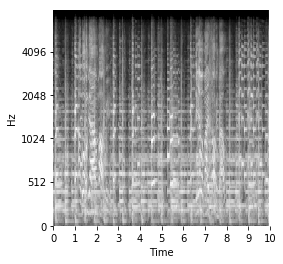

In [6]:
directory = 'genres_wav'

styles = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

print("finding minimum number of samples")
minSamples = None
for style in styles:
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            if(minSamples == None or len(samples) < minSamples):
                minSamples = len(samples)

# number of frequency bins (vertical resolution of the spectrogram)
n_mels = 128

# into how many spectrograms should a single song be splitted
n_splits = 3

split_size = minSamples // n_splits
used_samples = n_splits*split_size
                
print("The minimum number of samples is: ",minSamples)

for style in styles:
    print("Working on "+style+" files")
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            #print("    converting "+filename)
            restart_line()
            sys.stdout.write("    converting "+filename)
            sys.stdout.flush()
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            
            # make the sample mono
            samples = samples[:,0]
            
            # normalize samples
            samples = samples / np.max(np.abs(samples))

            # split the sample    
            splits = [samples[i*split_size:(i+1)*split_size] for i in range(n_splits)]
            
            for i, split in enumerate(splits):
                S = librosa.feature.melspectrogram(y=split, sr=sample_rate, n_mels=n_mels, n_fft=2048, hop_length=512, power=2.0)

                pylab.figure(figsize=(3,3))
                pylab.axis('off') 
                pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
                librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")
                pylab.savefig('genres_spectrograms/'+style+'/'+filename+'-'+str(i)+'.png', bbox_inches=None, pad_inches=0)
                pylab.clf()
                pylab.close()
print("done")

In [3]:
directory = 'genres_wav'

styles = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

print("finding minimum number of samples")
minSamples = None
for style in styles:
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            if(minSamples == None or len(samples) < minSamples):
                minSamples = len(samples)

# number of frequency bins (vertical resolution of the spectrogram)
n_mels = 128

# window size
window_size = 100000
window_step =  70000
n_rolls = int((minSamples-window_size)/window_step)
                
print("The minimum number of samples is: ",minSamples)

for style in styles:
    print("Working on "+style+" files")
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            #print("    converting "+filename)
            restart_line()
            sys.stdout.write("    converting "+filename)
            sys.stdout.flush()
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            
            # make the sample mono
            samples = samples[:,0]
            
            # normalize samples
            samples = samples / np.max(np.abs(samples))

            # split the sample    
            splits = []
            for roll in range(n_rolls):
                splits.append(samples[:window_size])
                samples = np.roll(samples, -window_step)
            
            for i, split in enumerate(splits):
                S = librosa.feature.melspectrogram(y=split, sr=sample_rate, n_mels=n_mels, n_fft=2048, hop_length=512, power=2.0)

                pylab.figure(figsize=(3,3))
                pylab.axis('off') 
                pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
                librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")
                pylab.savefig('genres_spectrograms/'+style+'/'+filename+'-'+str(i)+'.png', bbox_inches=None, pad_inches=0)
                pylab.clf()
                pylab.close()
print("done")

finding minimum number of samples
The minimum number of samples is:  658996
Working on blues files
    converting blues.00023.wavWorking on classical files
    converting classical.00046.wavWorking on country files
    converting country.00093.wavWorking on disco files
    converting disco.00011.wavWorking on hiphop files
    converting hiphop.00048.wavWorking on jazz files
    converting jazz.00020.wavWorking on metal files
    converting metal.00006.wavWorking on pop files
    converting pop.00052.wavWorking on reggae files
    converting reggae.00045.wavWorking on rock files
    converting rock.00033.wavdone
